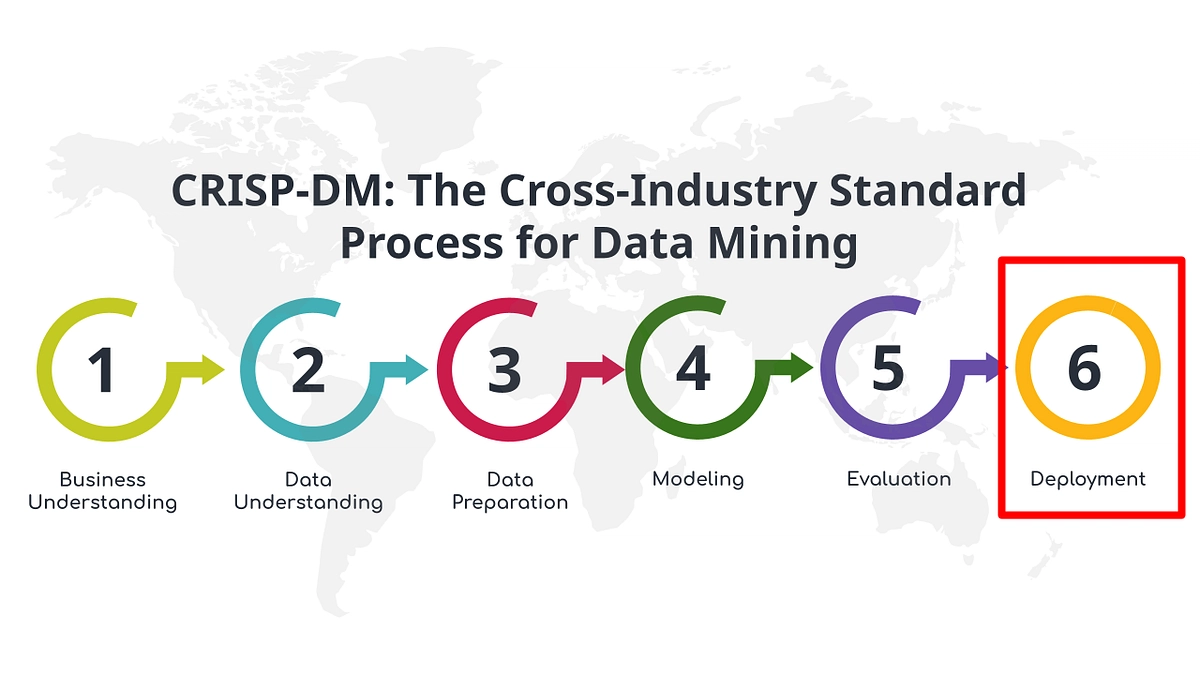
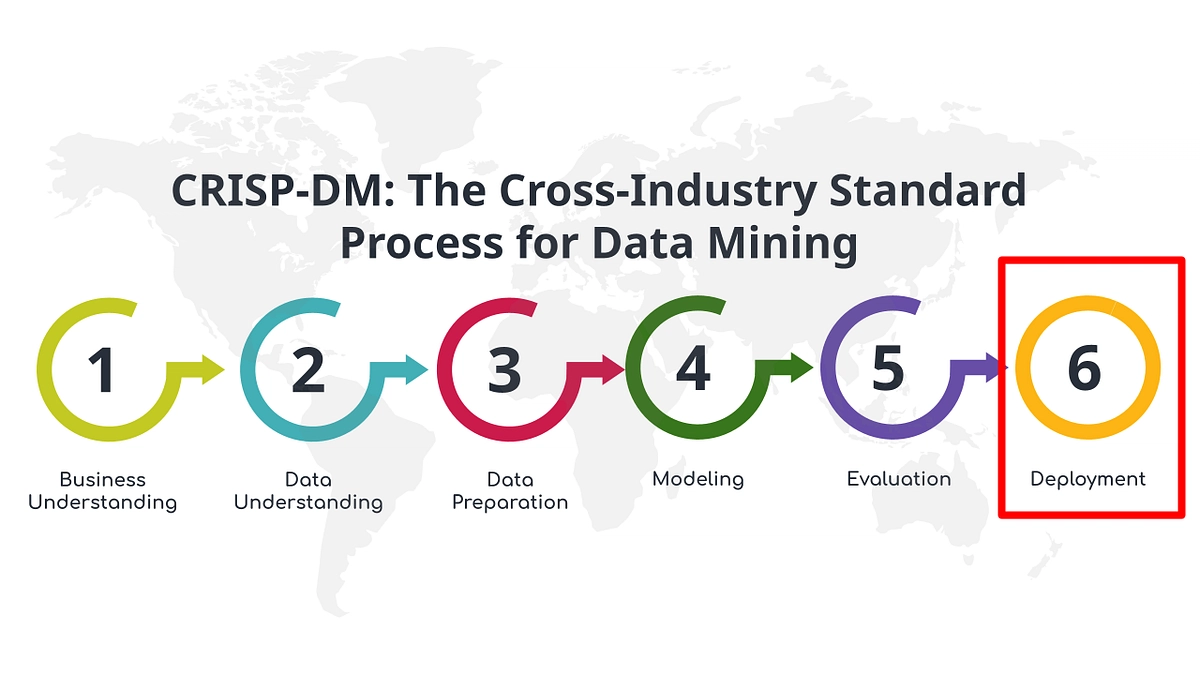

# Librerias

In [1]:
# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Modelos comunes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluacion de modelos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score


# 1. Business Understanding

**Objetivo principal:** predecir la supervivencia de los pasajeros.

**Preguntas clave:**

¿Qué factores influyen más en la supervivencia?

¿Existen patrones según edad, sexo, clase, etc.?

¿Qué tan bien se puede predecir con Machine Learning?

---

# 2. Data Understanding

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def resumen_nulos(df):
    resumen = pd.DataFrame({
        'Tipo de Dato': df.dtypes,
        'Nulos': df.isnull().sum(),
        'Porcentaje Nulos (%)': df.isnull().mean() * 100,
        'Valores Únicos': df.nunique(dropna=True)
    })

    resumen = resumen.sort_values(by='Nulos', ascending=False)
    
    print("Resumen de Nulos y Características del DataFrame:\n")
    print(resumen)

    total_nulos = df.isnull().sum().sum()
    total_valores = df.size
    print(f"\nTotal de valores nulos en el DataFrame: {total_nulos}")
    print(f"Porcentaje total de nulos: {100 * total_nulos / total_valores:.2f}%")

resumen_nulos(train_df)


Resumen de Nulos y Características del DataFrame:

            Tipo de Dato  Nulos  Porcentaje Nulos (%)  Valores Únicos
Cabin             object    687             77.104377             147
Age              float64    177             19.865320              88
Embarked          object      2              0.224467               3
PassengerId        int64      0              0.000000             891
Survived           int64      0              0.000000               2
Pclass             int64      0              0.000000               3
Name              object      0              0.000000             891
Sex               object      0              0.000000               2
SibSp              int64      0              0.000000               7
Parch              int64      0              0.000000               7
Ticket            object      0              0.000000             681
Fare             float64      0              0.000000             248

Total de valores nulos en el DataFrame

**Descripción general**

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.duplicated().sum()

0

In [7]:
catcols_train = train_df.describe(include=['object']).columns
catcols_train

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [8]:
numcols_train = train_df.describe(include=['int64','float64']).columns
numcols_train

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

- Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
- Categorical Features: Survived, Sex, Embarked, Pclass

## Exploratory data analysis (EDA)

<Axes: xlabel='Sex', ylabel='Survived'>

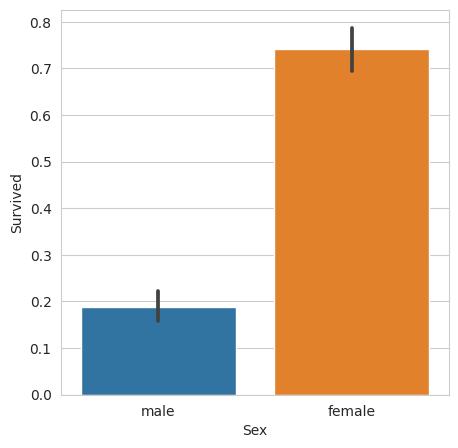

In [9]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (5, 5) 
sns.barplot(x="Sex", y="Survived", data=train_df)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


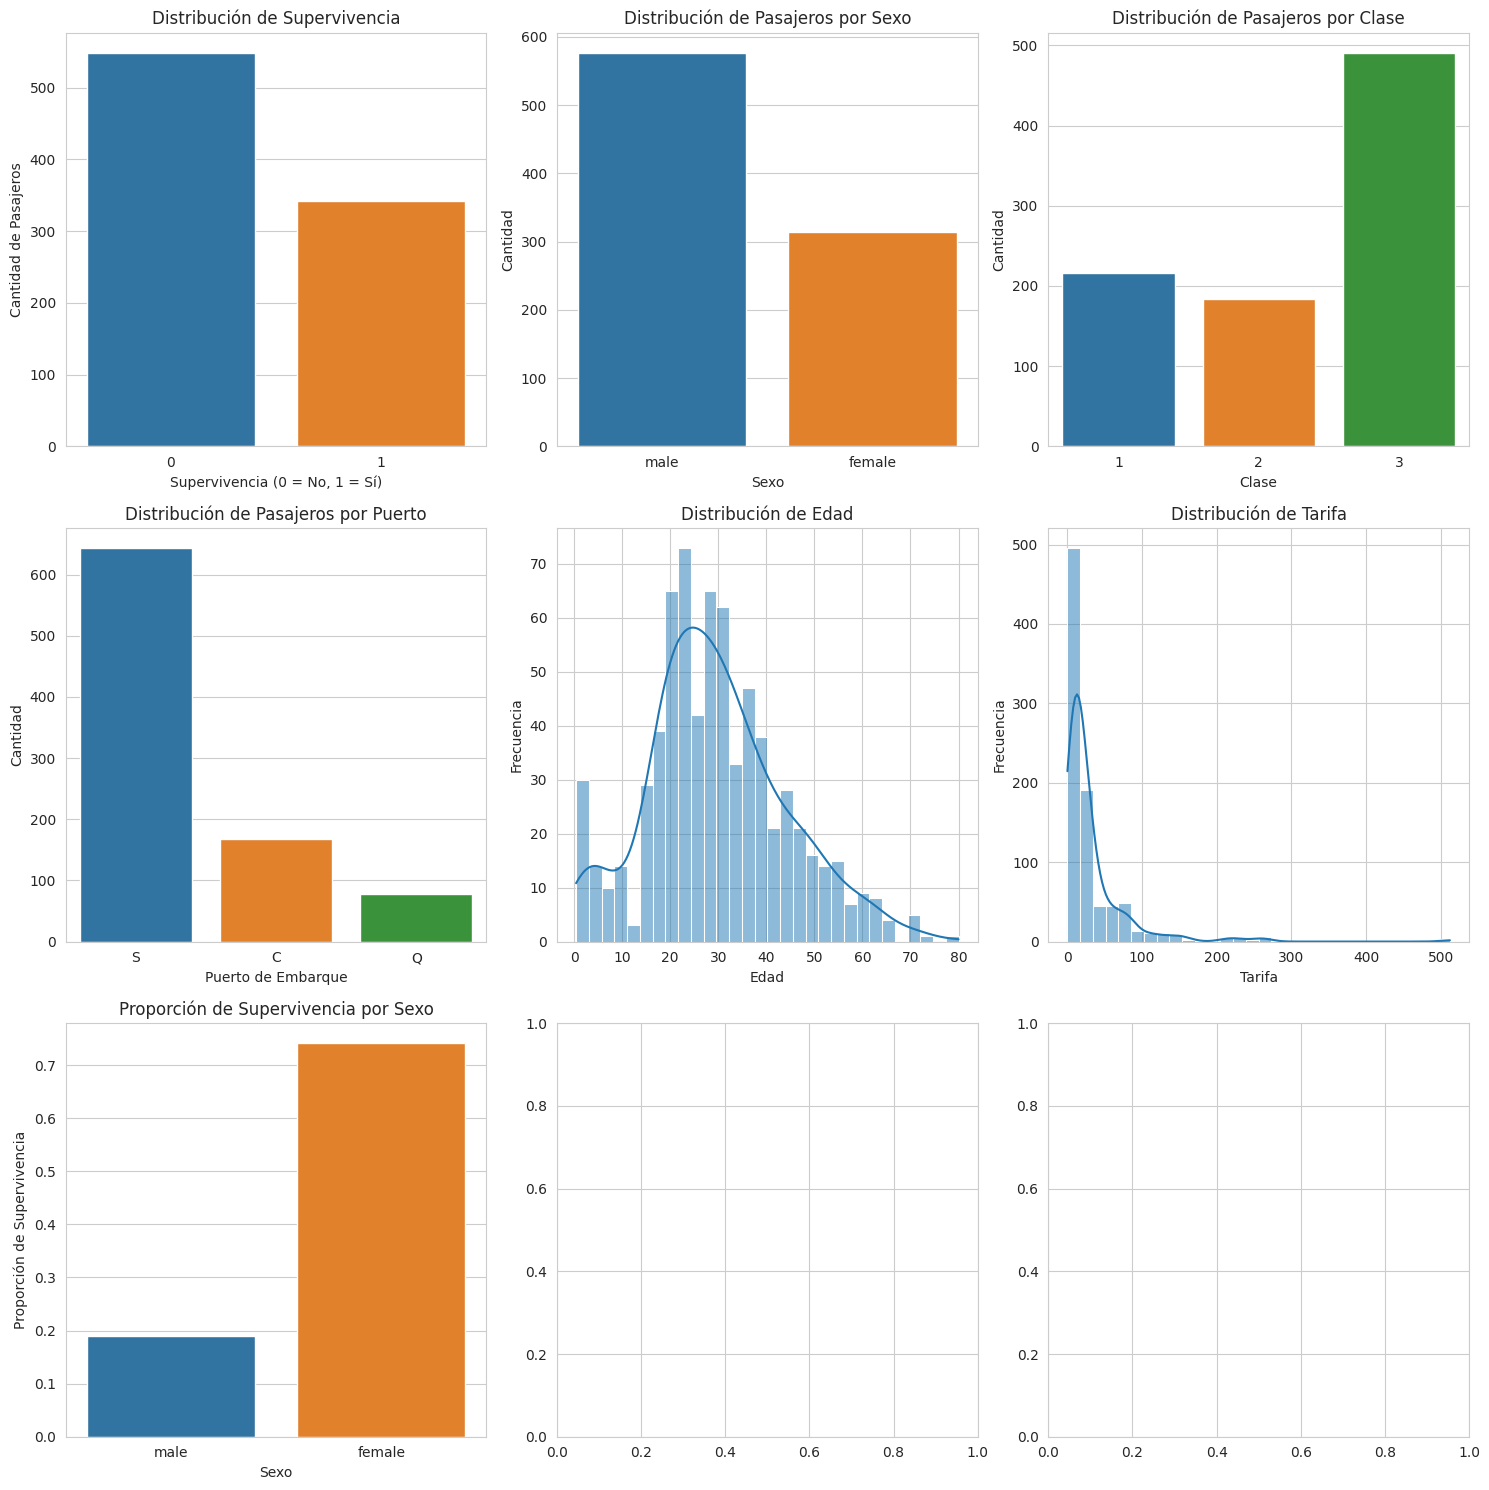

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (15, 15) 

# Crear una cuadrícula de 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# 1. Distribución de Survived
sns.countplot(x="Survived", data=train_df, ax=axes[0])
axes[0].set_title("Distribución de Supervivencia")
axes[0].set_xlabel("Supervivencia (0 = No, 1 = Sí)")
axes[0].set_ylabel("Cantidad de Pasajeros")

# 2. Distribución de Sex
sns.countplot(x="Sex", data=train_df, ax=axes[1])
axes[1].set_title("Distribución de Pasajeros por Sexo")
axes[1].set_xlabel("Sexo")
axes[1].set_ylabel("Cantidad")

# 3. Distribución de Pclass
sns.countplot(x="Pclass", data=train_df, ax=axes[2])
axes[2].set_title("Distribución de Pasajeros por Clase")
axes[2].set_xlabel("Clase")
axes[2].set_ylabel("Cantidad")

# 4. Distribución de Embarked
sns.countplot(x="Embarked", data=train_df, ax=axes[3])
axes[3].set_title("Distribución de Pasajeros por Puerto")
axes[3].set_xlabel("Puerto de Embarque")
axes[3].set_ylabel("Cantidad")

# 5. Distribución de Age
sns.histplot(train_df["Age"].dropna(), bins=30, kde=True, ax=axes[4])
axes[4].set_title("Distribución de Edad")
axes[4].set_xlabel("Edad")
axes[4].set_ylabel("Frecuencia")

# 6. Distribución de Fare
sns.histplot(train_df["Fare"], bins=30, kde=True, ax=axes[5])
axes[5].set_title("Distribución de Tarifa")
axes[5].set_xlabel("Tarifa")
axes[5].set_ylabel("Frecuencia")

# 7. Proporción de Supervivencia por Sexo
sns.barplot(x="Sex", y="Survived", data=train_df, errorbar=None, ax=axes[6])
axes[6].set_title("Proporción de Supervivencia por Sexo")
axes[6].set_xlabel("Sexo")
axes[6].set_ylabel("Proporción de Supervivencia")

# 
plt.tight_layout()
plt.show()

Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


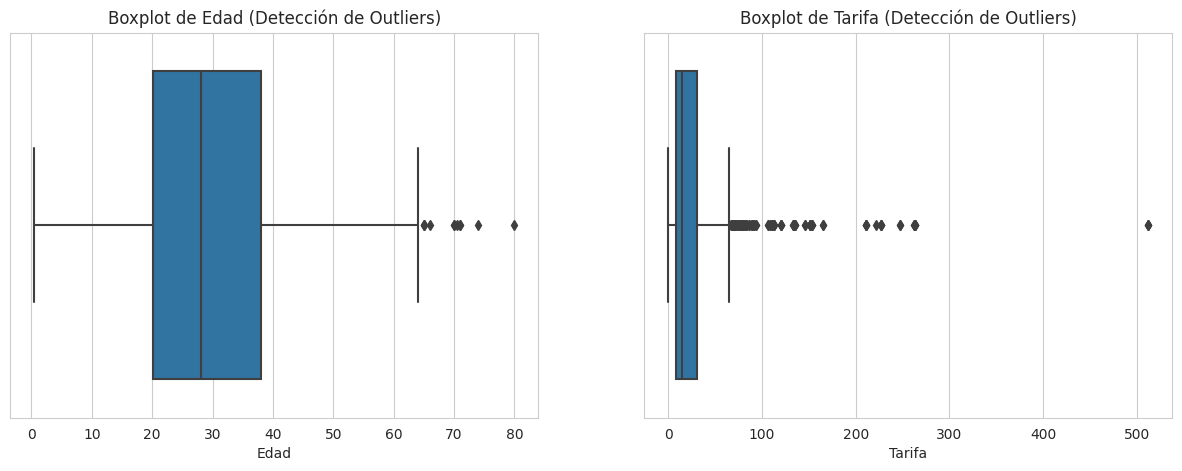

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()
# 1. Detección de outliers: Fare y Age - Boxplots
# Boxplot para Age
plt.figure()
sns.boxplot(x="Age", data=train_df,ax=axes[0])
axes[0].set_title("Boxplot de Edad (Detección de Outliers)")
axes[0].set_xlabel("Edad")

# Boxplot para Fare
plt.figure()
sns.boxplot(x="Fare", data=train_df,ax=axes[1])
axes[1].set_title("Boxplot de Tarifa (Detección de Outliers)")
axes[1].set_xlabel("Tarifa")


# 2. Valores faltantes: Contar NaN en cada columna
print("Valores faltantes por columna:")
print(train_df.isna().sum())


**Interpretation**

# 3. Preparación de los Datos

## Tratamiento de valores faltantes:

In [12]:
# Imputar 'Age' con la mediana
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# Imputar 'Embarked' con la moda
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Eliminar columnas con muchos nulos e innecesarias
train_df = train_df.drop(['Cabin','Name','Ticket'], axis = 1)
test_df = test_df.drop(['Cabin','Name','Ticket'], axis = 1)

## Codificación de variables categóricas

In [13]:
# Codificar 'Sex' (0 = female, 1 = male)
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1})

# One-hot encoding para 'Embarked' => Embarked_Q	Embarked_S
embarked_encoded = pd.get_dummies(train_df['Embarked'], prefix='Embarked', drop_first=True)
train_df = pd.concat([train_df, embarked_encoded], axis=1)
# train_df = train_df.drop('Embarked', axis=1)

In [14]:
train_df.sample(9)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Q,Embarked_S
602,603,0,1,1,28.0,0,0,42.4000,S,False,True
677,678,1,3,0,18.0,0,0,9.8417,S,False,True
221,222,0,2,1,27.0,0,0,13.0000,S,False,True
785,786,0,3,1,25.0,0,0,7.2500,S,False,True
815,816,0,1,1,28.0,0,0,0.0000,S,False,True
852,853,0,3,0,9.0,1,1,15.2458,C,False,False
253,254,0,3,1,30.0,1,0,16.1000,S,False,True
81,82,1,3,1,29.0,0,0,9.5000,S,False,True
798,799,0,3,1,30.0,0,0,7.2292,C,False,False


## Ingeniería de variables:

In [15]:
# # Agrupar 'Age' en bins
# age_bins = [0, 12, 18, 60, 120]  # Child, Young, Adult, Senior
# age_labels = ['Child', 'Young', 'Adult', 'Senior']
# train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

## Seleccion de variables

In [16]:
#SELECCIONAR VARIABLES
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = train_df[features]
y = train_df['Survived']


# 4. Modelado

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
331,1,1,45.5,0,0,28.5000,False,True
733,2,1,23.0,0,0,13.0000,False,True
382,3,1,32.0,0,0,7.9250,False,True
704,3,1,26.0,1,0,7.8542,False,True
813,3,0,6.0,4,2,31.2750,False,True
...,...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,False,True
270,1,1,28.0,0,0,31.0000,False,True
860,3,1,41.0,2,0,14.1083,False,True
435,1,0,14.0,1,2,120.0000,False,True


In [19]:
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    resultados.append([nombre, acc, prec, rec, f1])



# 5. Evaluación

In [20]:
resultados_df = pd.DataFrame(resultados, columns=["Modelo", "Accuracy", "Precision", "Recall", "F1-Score"])
print(resultados_df)

                Modelo  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.810056   0.785714  0.743243  0.763889
1        Decision Tree  0.787709   0.743243  0.743243  0.743243
2        Random Forest  0.810056   0.785714  0.743243  0.763889
3                  KNN  0.698324   0.678571  0.513514  0.584615
4                  SVM  0.653631   0.750000  0.243243  0.367347


In [21]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,S,False,True
1,2,1,1,0,38.0,1,0,71.2833,C,False,False
2,3,1,3,0,26.0,0,0,7.9250,S,False,True
3,4,1,1,0,35.0,1,0,53.1000,S,False,True
4,5,0,3,1,35.0,0,0,8.0500,S,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S,False,True
887,888,1,1,0,19.0,0,0,30.0000,S,False,True
888,889,0,3,0,28.0,1,2,23.4500,S,False,True
889,890,1,1,1,26.0,0,0,30.0000,C,False,False


In [22]:
X_test_final = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

# Imputar valores nulos
X_test_final['Age'] = X_test_final['Age'].fillna(X['Age'].median())
X_test_final['Fare'] = X_test_final['Fare'].fillna(X['Fare'].median())
X_test_final['Embarked'] = X_test_final['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Codificación
X_test_final['Sex'] = X_test_final['Sex'].map({'female': 0, 'male': 1})
embarked_encoded_test = pd.get_dummies(X_test_final['Embarked'], prefix='Embarked', drop_first=True)
X_test_final = pd.concat([X_test_final.drop('Embarked', axis=1), embarked_encoded_test], axis=1)

X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)

# Predicciones
predicciones = modelos["Logistic Regression"].predict(X_test_final)
print(predicciones[:10])

[0 0 0 0 1 0 1 0 1 0]


In [23]:
output = pd.DataFrame({"passengerId":test_df.PassengerId,'survived':predicciones})
output.to_csv("submission.csv",index=False)

# 6. Despliegue